In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

(-1.1, 1.1, -0.9819621404912775, 0.9815631986127462)

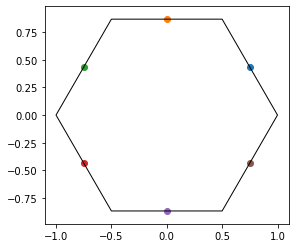

In [13]:
size=1
dist = size/2
h = Hex(0,0, size)
h.get_verts()
h.render(fill=None)

pts = h.get_edge_midpoints()

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

(-0.9710945046029151, 0.96289457163562, -1.1, 1.1)

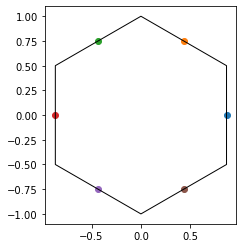

In [14]:
size=1
dist = size/2
h = Hex(0,0, size, flat=False)
h.get_verts()
h.render(fill=None)

pts = h.get_edge_midpoints()

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

### How many possible ways to connect the Midpoints?

6 choose 2


In [20]:
#https://stackoverflow.com/questions/5360220/how-to-split-a-list-into-pairs-in-all-possible-ways
emp_pairs = [[(0, 1), (2, 3), (4, 5)],
 [(0, 1), (2, 4), (3, 5)],
 [(0, 1), (2, 5), (3, 4)],
 [(0, 2), (1, 3), (4, 5)],
 [(0, 2), (1, 4), (3, 5)],
 [(0, 2), (1, 5), (3, 4)],
 [(0, 3), (1, 2), (4, 5)],
 [(0, 3), (1, 4), (2, 5)],
 [(0, 3), (1, 5), (2, 4)],
 [(0, 4), (1, 2), (3, 5)],
 [(0, 4), (1, 3), (2, 5)],
 [(0, 4), (1, 5), (2, 3)],
 [(0, 5), (1, 2), (3, 4)],
 [(0, 5), (1, 3), (2, 4)],
 [(0, 5), (1, 4), (2, 3)]]

[(0, 2), (1, 4), (3, 5)]

(0.8660254037844387, 5.551115123125783e-17) (-0.4330127018922193, 0.7500000000000001)
(0.4330127018922194, 0.75) (-0.43301270189221935, -0.7500000000000003)
(-0.8660254037844388, -5.551115123125783e-17) (0.43301270189221913, -0.75)


(-0.9526279441628827,
 0.9526279441628827,
 -0.8250000000000004,
 0.8250000000000002)

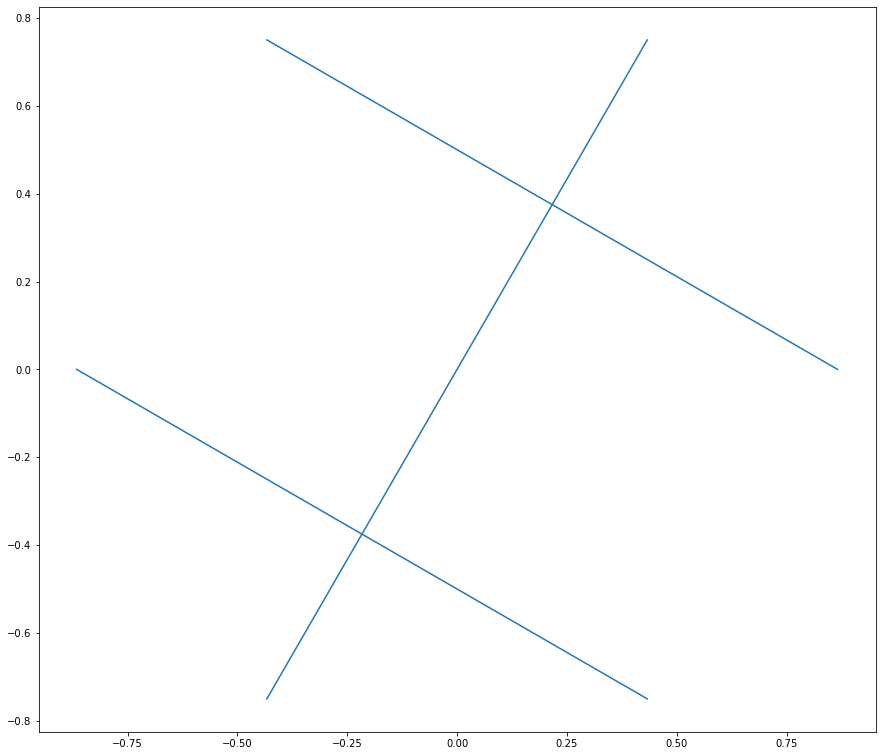

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

mid_pts = h.get_edge_midpoints()
pairs = emp_pairs[4]
for mid_pair in pairs:
    print(mid_pts[mid_pair[0]], mid_pts[mid_pair[1]])
    x_arr = [mid_pts[mid_pair[0]][0], mid_pts[mid_pair[1]][0]]
    y_arr = [mid_pts[mid_pair[0]][1], mid_pts[mid_pair[1]][1]]    
    md_connect = Line2D([x_arr],[y_arr])# **kwargs)
    ax.add_line(md_connect)
    
plt.axis('scaled')

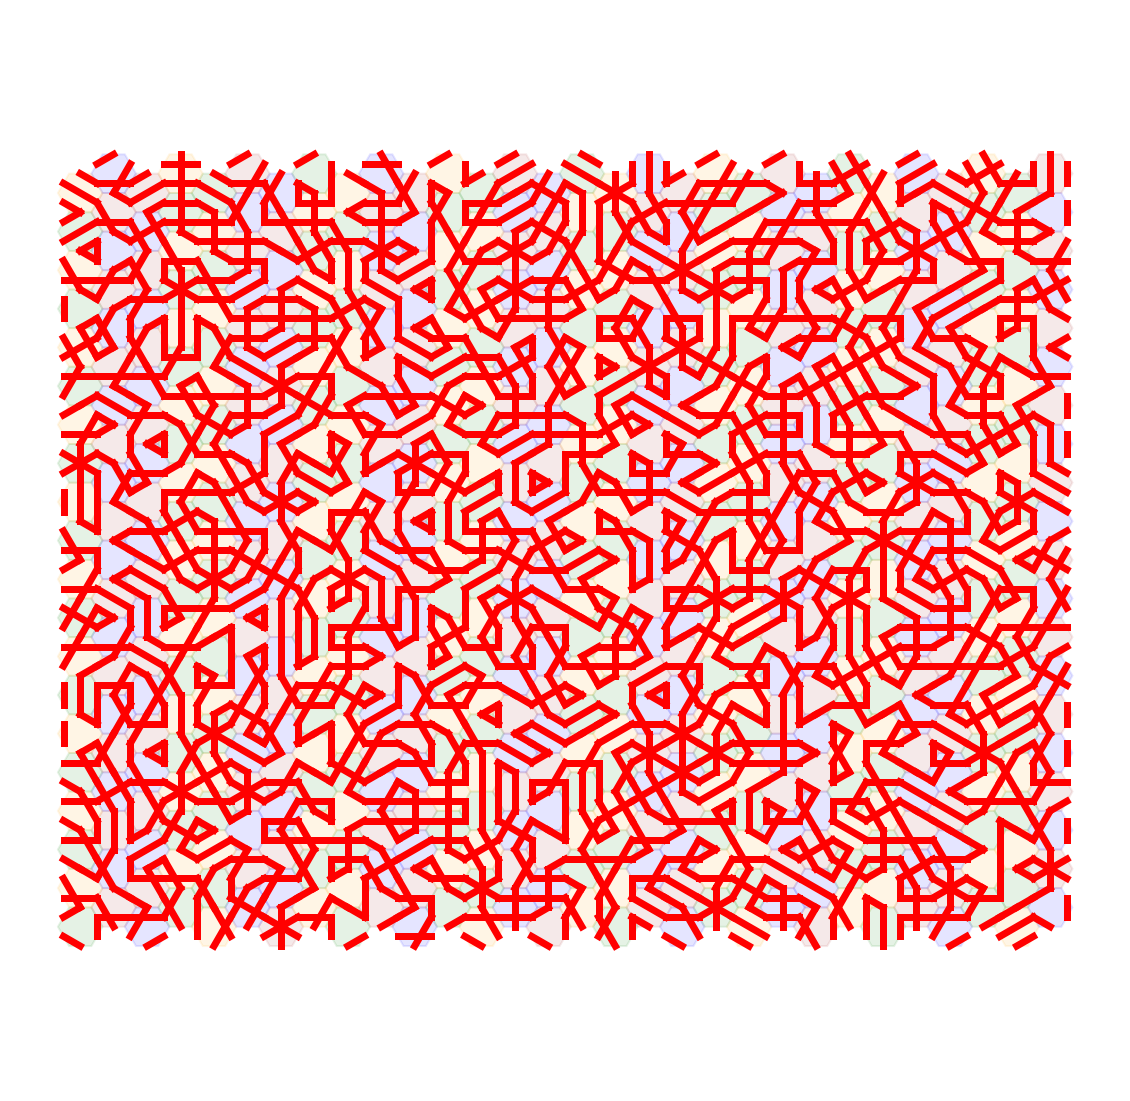

In [113]:
fig, ax = plt.subplots(figsize=(20,20))

size=2
hg = HexGrid(40,15,size, flat=True)

COL2 = ['green', 'blue', 'orange', 'brown']

for idx, h in enumerate(hg.hlist):
    h.render(color=COL2[idx%4], lw=2, alpha=0.1)
    pairs = emp_pairs[np.random.randint(15)]
    mid_pts = h.get_edge_midpoints()

    for mid_pair in pairs: #3 Lines
        x_arr = [mid_pts[mid_pair[0]][0], mid_pts[mid_pair[1]][0]]
        y_arr = [mid_pts[mid_pair[0]][1], mid_pts[mid_pair[1]][1]]    
        md_connect = Line2D([x_arr],[y_arr], lw=7, color='red')
        ax.add_line(md_connect)

plt.axis('equal')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-30, 30)
    
plt.axis('off')

save_file('EDGE_MID_PTS')


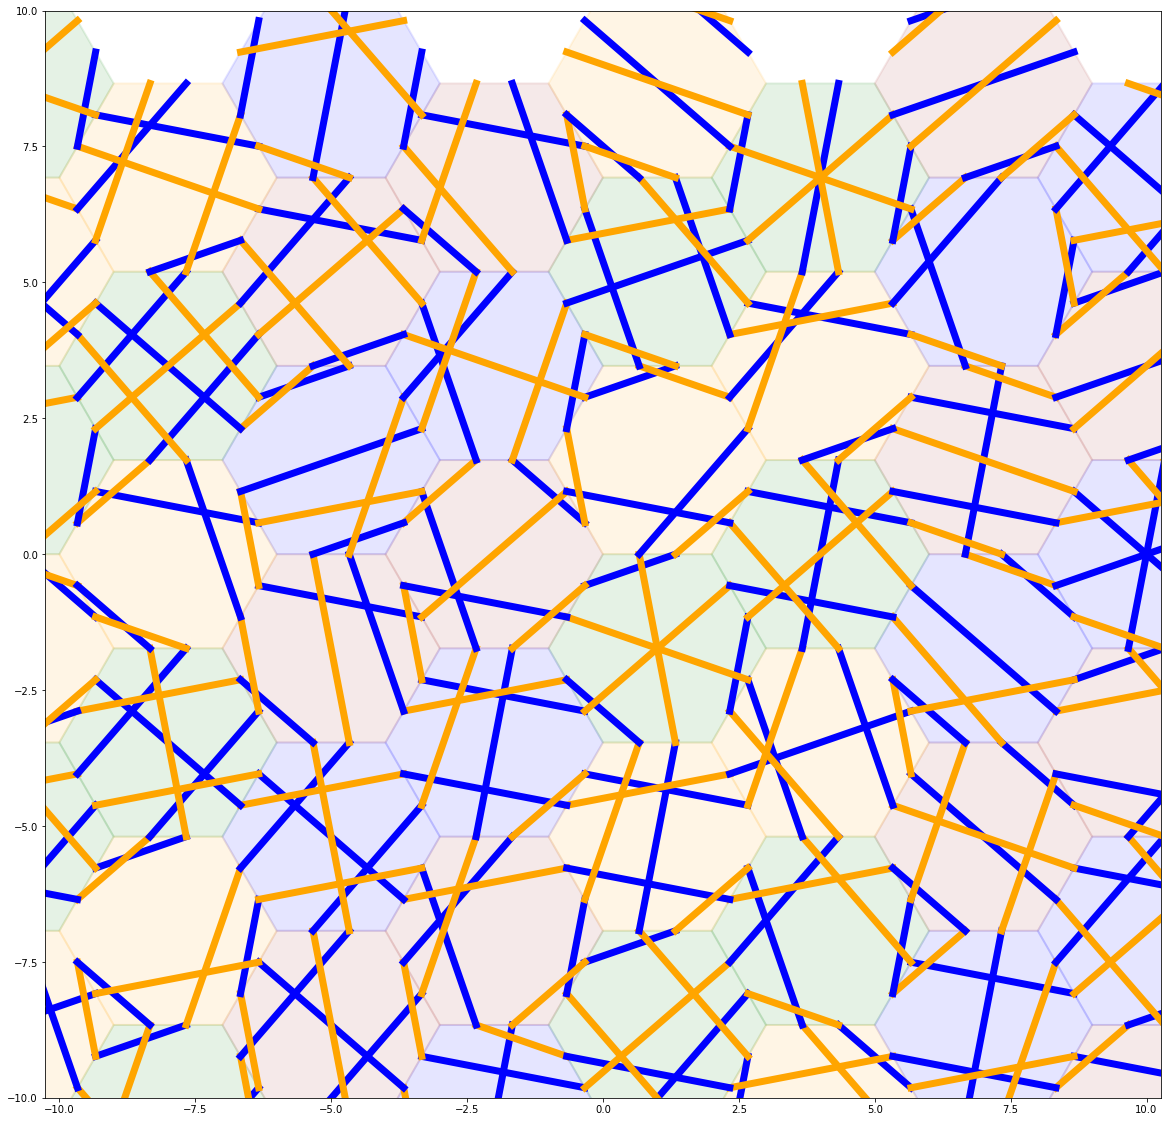

In [116]:
fig, ax = plt.subplots(figsize=(20,20))

size=2
hg = HexGrid(12,15,size, flat=True)

COL2 = ['green', 'blue', 'orange', 'brown']

for idx, h in enumerate(hg.hlist):
    h.render(color=COL2[idx%4], lw=2, alpha=0.1)
    mpts1 = h.get_points_vert_rtheta(size/3, 30)
    mpts2 = h.get_points_vert_rtheta(size*2/3, 30)
    for midx, mpts in enumerate([mpts1, mpts2]):
        pairs = emp_pairs[np.random.randint(15)]
        for mid_pair in pairs: #3 Lines
            x_arr = [mpts[mid_pair[0]][0], mpts[mid_pair[1]][0]]
            y_arr = [mpts[mid_pair[0]][1], mpts[mid_pair[1]][1]]    
            md_connect = Line2D([x_arr],[y_arr], lw=7, color=COL2[midx+1])
            ax.add_line(md_connect)

plt.axis('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
    
#plt.axis('off')

save_file('EDGE_MID_PTS')


## All Roads Lead to Rome

Why not have two sets of roads, all over the map? For that we have to track the two roads separately.

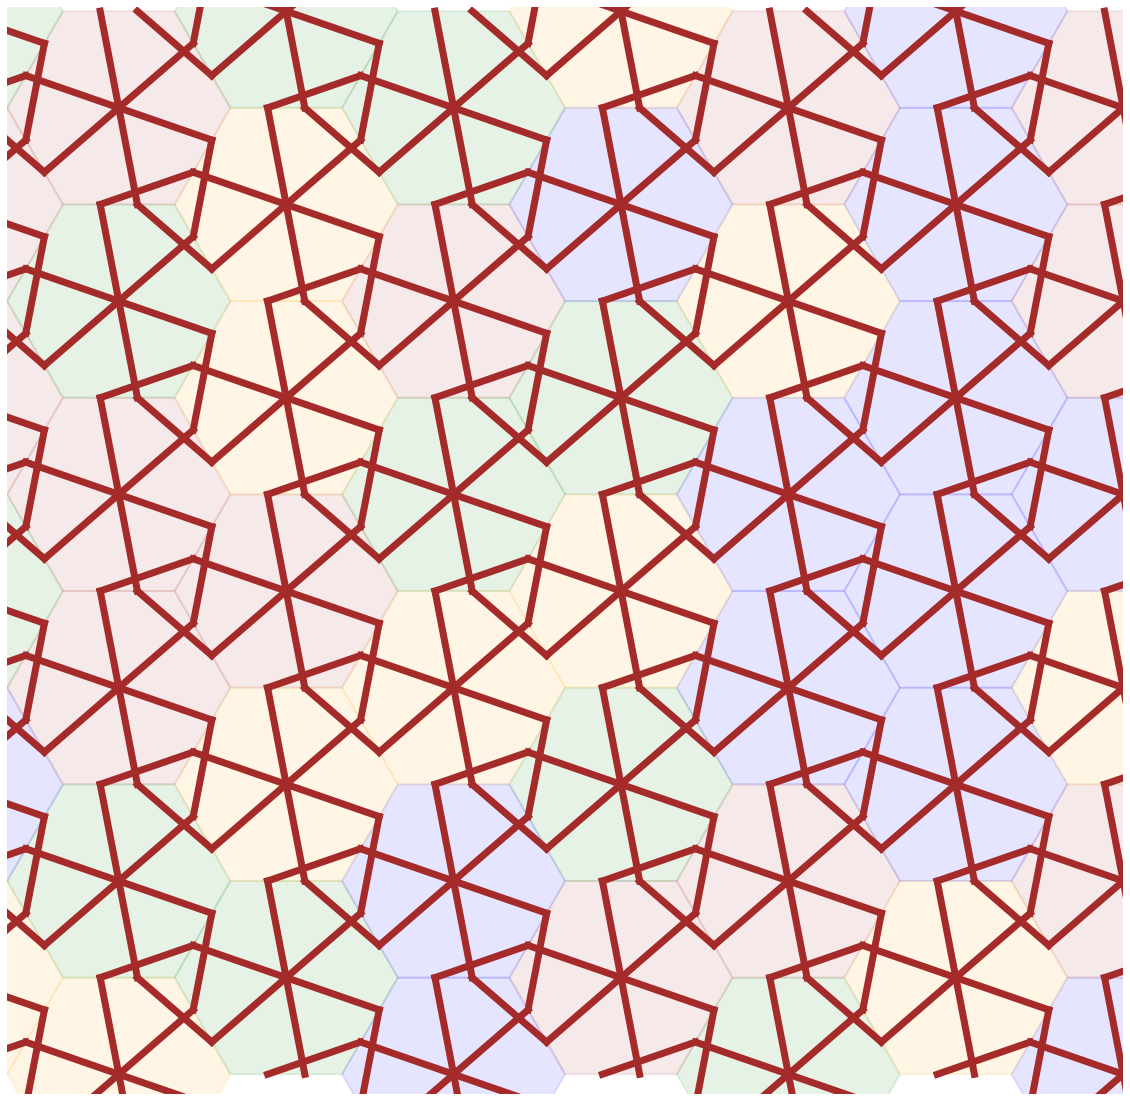

In [141]:
fig, ax = plt.subplots(figsize=(20,20))

size=2
hg = HexGrid(12,15,size, flat=True)

COL2 = ['green', 'blue', 'orange', 'brown']

pairsA = emp_pairs[np.random.randint(15)]
pairsB = emp_pairs[np.random.randint(15)]
    

for idx, h in enumerate(hg.hlist):
    h.render(color=np.random.choice(COL2), lw=2, alpha=0.1)
    mptsA = h.get_points_vert_rtheta(size/3, 30)
    mptsB = h.get_points_vert_rtheta(size*2/3, 30)
    
    for mid_pair in pairsA: #3 sets of pairs
        x_arr = [mptsA[mid_pair[0]][0], mptsA[mid_pair[1]][0]]
        y_arr = [mptsA[mid_pair[0]][1], mptsA[mid_pair[1]][1]]    
        md_connect = Line2D([x_arr],[y_arr], lw=7, color=COL2[3])
        ax.add_line(md_connect)

    for mid_pair in pairsB: #3 sets of pairs
        x_arr = [mptsB[mid_pair[0]][0], mptsB[mid_pair[1]][0]]
        y_arr = [mptsB[mid_pair[0]][1], mptsB[mid_pair[1]][1]]    
        md_connect = Line2D([x_arr],[y_arr], lw=7, color=COL2[3])
        ax.add_line(md_connect)

plt.axis('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 8)
    
plt.axis('off')

save_file('EDGE_MID_PTS')

In [74]:
size = fig.get_size_inches()
print(f"Size in Inches {size}")
    

Size in Inches [20. 30.]
